In [52]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
#from keras.utils.layer_utils import count_params
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
import itertools
import os
import random
import glob
import shutil
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)


In [53]:

# Making the folders for storing the subset of the dataset
loc = r'C:\Users\suyash\Desktop\cats vs dogs\train'
os.chdir(loc)

if os.path.isdir('train/dog') is False:
    os.makedirs('train/dog')
    os.makedirs('train/cat')
    os.makedirs('valid/dog')
    os.makedirs('valid/cat')
    os.makedirs('test/dog')
    os.makedirs('test/cat')

    for c in random.sample(glob.glob('cat*'),500):
        shutil.move(c, 'train/cat')
    for c in random.sample(glob.glob('dog*'),500):
        shutil.move(c, 'train/dog')
    for c in random.sample(glob.glob('cat*'),100):
        shutil.move(c, 'valid/cat')
    for c in random.sample(glob.glob('dog*'),100):
        shutil.move(c, 'valid/dog')
    for c in random.sample(glob.glob('cat*'),50):
        shutil.move(c, 'test/cat')
    for c in random.sample(glob.glob('dog*'),50):
        shutil.move(c, 'test/dog')

train = r'C:\Users\suyash\Desktop\cats vs dogs\train\train'
valid = r'C:\Users\suyash\Desktop\cats vs dogs\train\valid'
test  = r'C:\Users\suyash\Desktop\cats vs dogs\train\test'

# In this we are doing some preproessing and then we are giving the size to resize the image and make  batches
# The preprocessing involves vgg16. This is also making the classes for the dataset
trainBatch = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
            .flow_from_directory(directory=train, target_size=(224,224), classes=['cat', 'dog'],batch_size=10)
validBatch = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
            .flow_from_directory(directory=valid, target_size=(224,224), classes=['cat', 'dog'],batch_size=10)
testBatch  = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
            .flow_from_directory(directory=test, target_size=(224,224), classes=['cat', 'dog'],batch_size=10)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

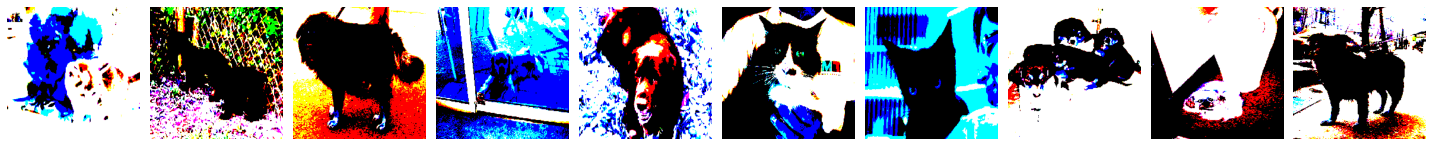

[[1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [54]:
assert trainBatch.n == 1000
assert validBatch.n == 200
assert testBatch.n == 100
assert trainBatch.num_classes == validBatch.num_classes == testBatch.num_classes == 2

imgs, labels = next(trainBatch)

def plotImage(image_arr):
    fig, axes = plt.subplots(1,10,figsize=(20,20))
    axes = axes.flatten()
    for img,ax in zip(image_arr, axes):
        ax.imshow(img)
        ax.axis('off')

    plt.tight_layout()
    plt.show()

plotImage(imgs)
print(labels)

In [55]:
# This is the structure of the CNN and here the padding same means that the padding is 0.
# Softmax activation is just finding the probability of the outputs by putting them in exponential
model = Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same',input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2,2), strides=2),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu',padding='same'),
    MaxPool2D(pool_size=(2,2), strides=2),
    Flatten(),
    Dense(units=2, activation='softmax'),
])

model.summary()

# Here metrics is given as to according to what parameter should the success of the model be determined
# Here the filters are not unit if a layer but are the height of the number of filters that will be applied 
# on the three layers therefore the output with respect to this layer will be of the height 3 time of the number 
# of filters that we are using 
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
#  Here a chaneg is possible that we can chaneg our loss to binary_crossentropy then we could change 
#  softmax function ids then needed to be replaced with the sigmoid function
#  Both of these work equally well and both are good ways to go.
#  This one writen above should only be used when their are 2 classes
#  The above is a generalized approach and can work for most of the cases


# With the help of the generator we have made the batches and the generated data is their with their y cordinates
model.fit(x=trainBatch, validation_data=validBatch, epochs=10, verbose=2)


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 200704)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 401410    
Total params: 420,802
Trainable params: 420,802
Non-trainable params: 0
________________________________________________

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

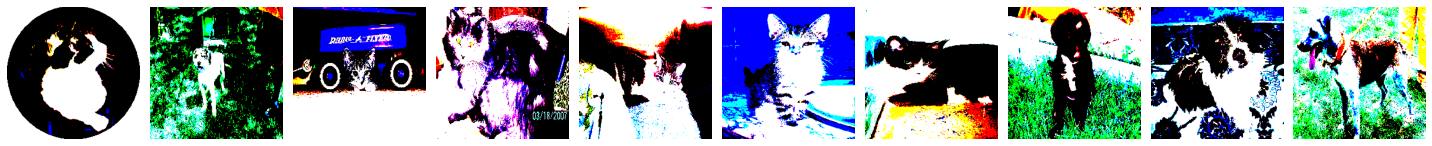

[[1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]] [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [56]:
# using the next function to get the batch of the training 
timgs, tlabels = next(testBatch)
plotImage(timgs)
print(tlabels,testBatch.classes)

In [57]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


In [58]:
# Finding the model performance and rounding it of to the closest value
predict = model.predict(x=testBatch, verbose=0)
np.round(predict)

# Calculating the confusion matrix
cm = confusion_matrix(y_true=testBatch.classes, y_pred= np.argmax(predict, axis=-1))

In [59]:
testBatch.class_indices

{'cat': 0, 'dog': 1}

Confusion matrix, without normalization
[[27 23]
 [21 29]]


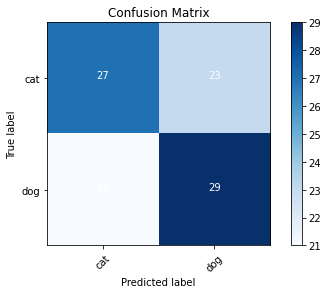

In [60]:
cm_label = ['cat', 'dog']
plot_confusion_matrix(cm=cm, classes=cm_label, title='Confusion Matrix', )

VGG16 Fine tuning of the Model

In [61]:
vgg16_model = tf.keras.applications.vgg16.VGG16()

In [62]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [63]:
type(vgg16_model)

tensorflow.python.keras.engine.functional.Functional

In [64]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

In [65]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [66]:
for layer in model.layers:
    layer.trainable = False

In [67]:
model.add(Dense(units=2,activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

Training and fine-tuned VGG16 model

In [68]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [69]:
model.fit(x=trainBatch, validation_data=validBatch, epochs=5, verbose=2)

Epoch 1/5
100/100 - 248s - loss: 0.3054 - accuracy: 0.8730 - val_loss: 0.1414 - val_accuracy: 0.9450
Epoch 2/5
100/100 - 252s - loss: 0.0912 - accuracy: 0.9690 - val_loss: 0.0945 - val_accuracy: 0.9800
Epoch 3/5
100/100 - 247s - loss: 0.0588 - accuracy: 0.9800 - val_loss: 0.0746 - val_accuracy: 0.9800
Epoch 4/5
100/100 - 247s - loss: 0.0445 - accuracy: 0.9860 - val_loss: 0.0661 - val_accuracy: 0.9800
Epoch 5/5
100/100 - 356s - loss: 0.0337 - accuracy: 0.9900 - val_loss: 0.0632 - val_accuracy: 0.9750


In [126]:
pred = model.predict(x=testBatch, verbose=0)

testBatch.classes

In [125]:
mc = confusion_matrix(y_true=testBatch.classes, y_pred=np.argmax(pred, axis=-1))
mc

array([[25, 25],
       [31, 19]], dtype=int64)